In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
df = pd.read_csv('weather_data.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [128]:
df.shape

(5999, 12)

In [129]:
list(df.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [130]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


### 1 Data Cleaning

In [131]:
# removed "Loud cover since all the values are 0s"

cols = [
 'Summary',
 'Precip Type',
 'Loud Cover',
 'Humidity',
 'Visibility (km)',
 'Daily Summary']

In [132]:
df = df.drop(cols, axis=1)

In [133]:
df.iloc[1464]

Formatted Date              2006-12-01 00:00:00.000 +0100
Temperature (C)                                  6.572222
Apparent Temperature (C)                         5.416667
Wind Speed (km/h)                                    6.44
Wind Bearing (degrees)                                340
Pressure (millibars)                              1038.06
Name: 1464, dtype: object

In [134]:
# Converting Formatted Date from object to DateTimeObject
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Temperature (C)           5999 non-null   float64            
 2   Apparent Temperature (C)  5999 non-null   float64            
 3   Wind Speed (km/h)         5999 non-null   float64            
 4   Wind Bearing (degrees)    5999 non-null   int64              
 5   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 281.3 KB


In [135]:
df.columns

Index(['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')

In [136]:
# Indexing according to date and time

# First we sort values
indexed_df = df.sort_values(['Formatted Date'])
indexed_df.head(5)

,Formatted Date,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
2880,2005-12-31 23:00:00+00:00,0.577778,-4.050000,17.1143,140,1016.66
2881,2006-01-01 00:00:00+00:00,1.161111,-3.238889,16.6152,139,1016.15
2882,2006-01-01 01:00:00+00:00,1.666667,-3.155556,20.2538,140,1015.87
2883,2006-01-01 02:00:00+00:00,1.711111,-2.194444,14.4900,140,1015.56
2884,2006-01-01 03:00:00+00:00,1.183333,-2.744444,13.9426,134,1014.98


In [141]:
# Setting the index

indexed_df = indexed_df.set_index('Formatted Date')
indexed_df.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [142]:
# Removing duplicated values according to the index/date

indexed_df.index.drop_duplicates(keep='first')

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2006-12-31 13:00:00+00:00', '2006-12-31 14:00:00+00:00',
               '2006-12-31 15:00:00+00:00', '2006-12-31 16:00:00+00:00',
               '2006-12-31 17:00:00+00:00', '2006-12-31 18:00:00+00:00',
               '2006-12-31 19:00:00+00:00', '2006-12-31 20:00:00+00:00',
               '2006-12-31 21:00:00+00:00', '2006-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=5999, freq=None)

In [147]:
# Checking for Na. If there is any we would go for .drop
indexed_df.isna().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Pressure (millibars)        0
dtype: int64

In [148]:
indexed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2005-12-31 23:00:00+00:00 to 2006-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Wind Speed (km/h)         5999 non-null   float64
 3   Wind Bearing (degrees)    5999 non-null   int64  
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 410.2 KB


### 2 Exploration analysis

<Axes: xlabel='Formatted Date'>

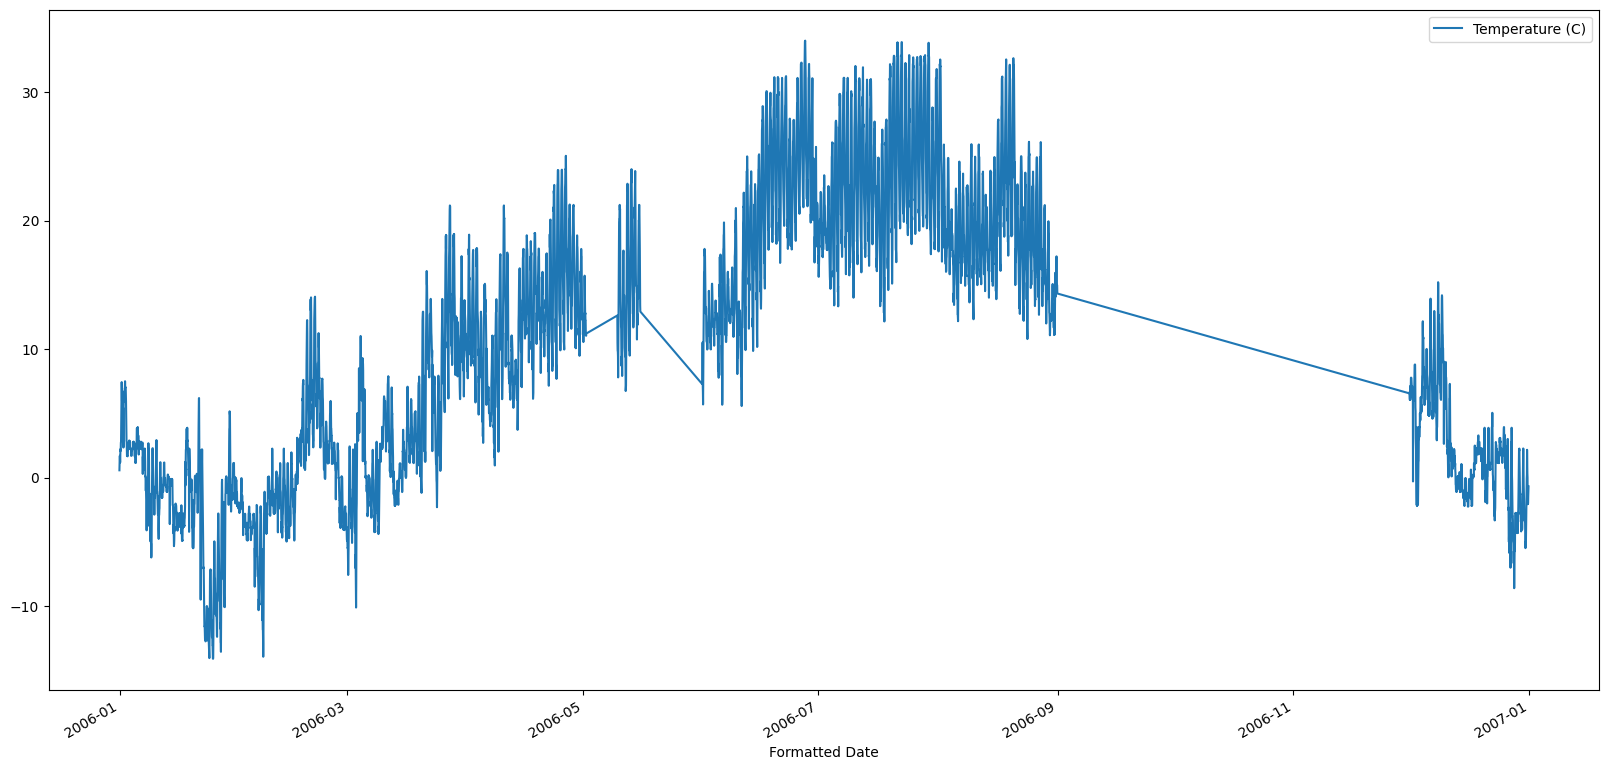

In [149]:
indexed_df.plot(y = 'Temperature (C)', figsize=(20,10))

In [152]:
# Resampling the data into day format

indexed_df2 = indexed_df.resample(rule='D').mean()
indexed_df2.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,17.114300,140.000000,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,21.229192,142.750000,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,17.824713,164.583333,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,7.726658,252.541667,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,12.152817,35.000000,981.770833


<Axes: xlabel='Formatted Date'>

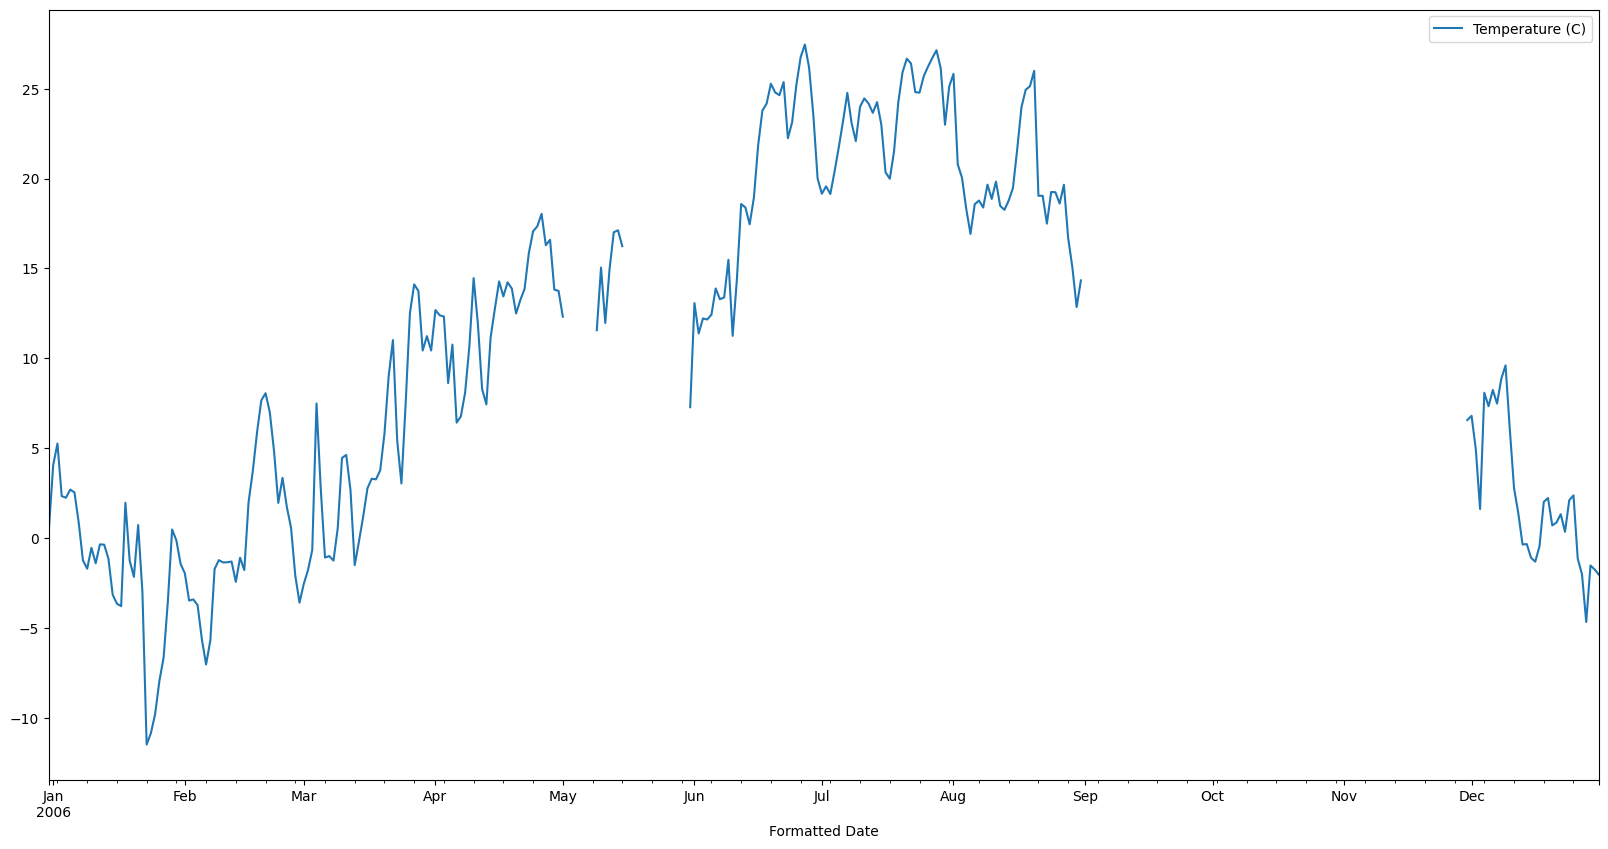

In [153]:
indexed_df2.plot(y = "Temperature (C)", figsize=(20,10))

<Axes: xlabel='Formatted Date'>

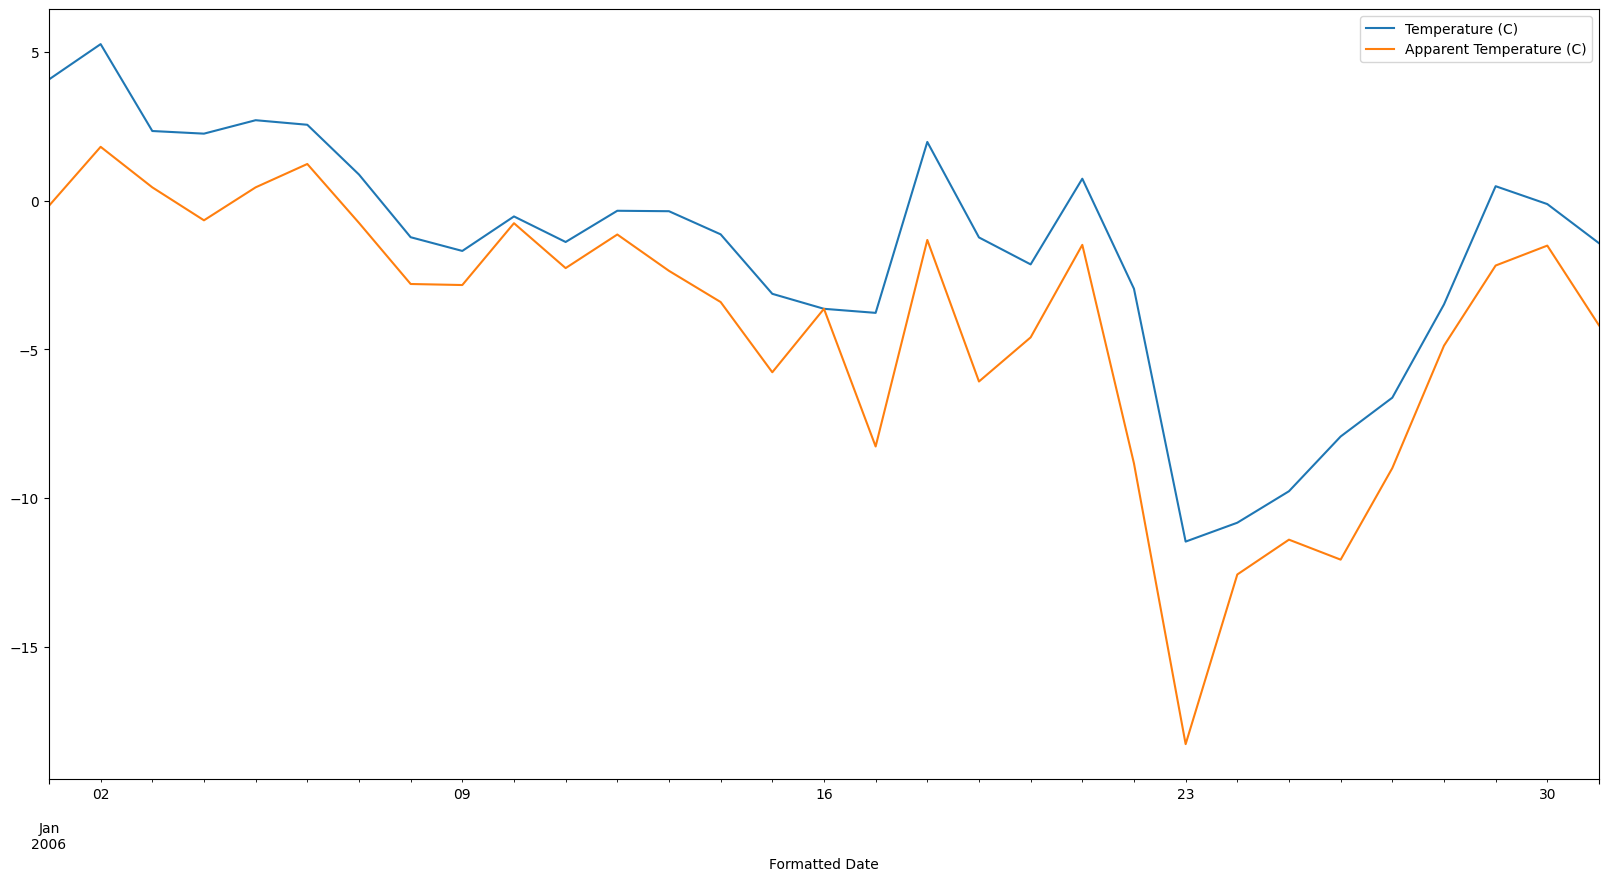

In [161]:
jan2006 = indexed_df2['2006-01-01':'2006-01-31']
jan2006.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))

In [162]:
winter = indexed_df2['2006-01-01':'2006-02-28']
spring = indexed_df2['2006-03-01':'2006-05-31']
summer = indexed_df2['2006-06-01':'2006-08-31']

<Axes: xlabel='Formatted Date'>

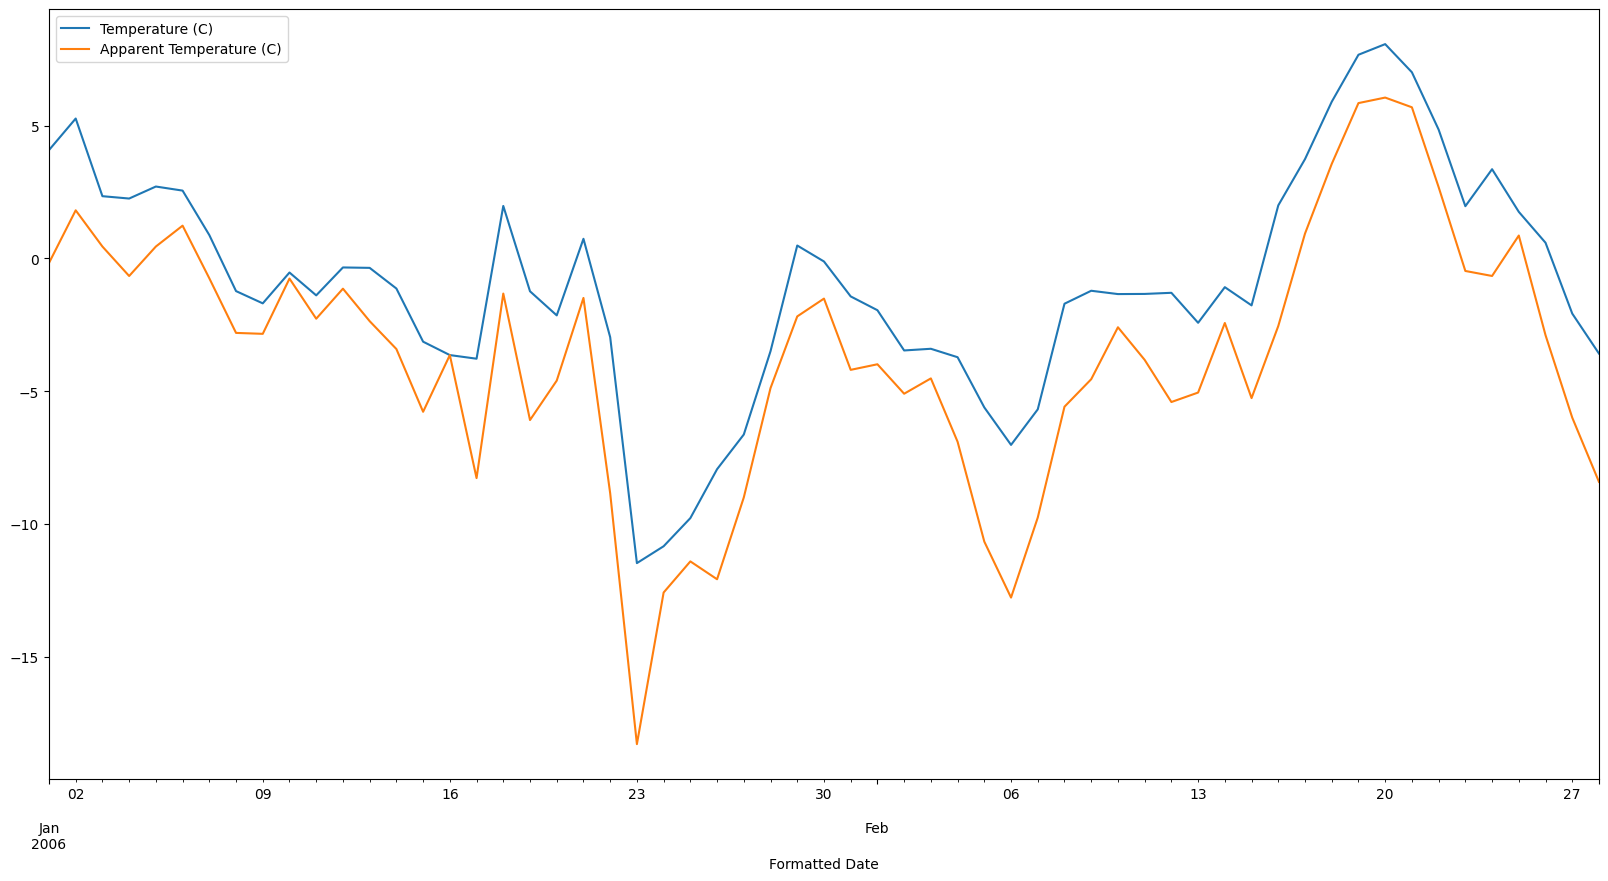

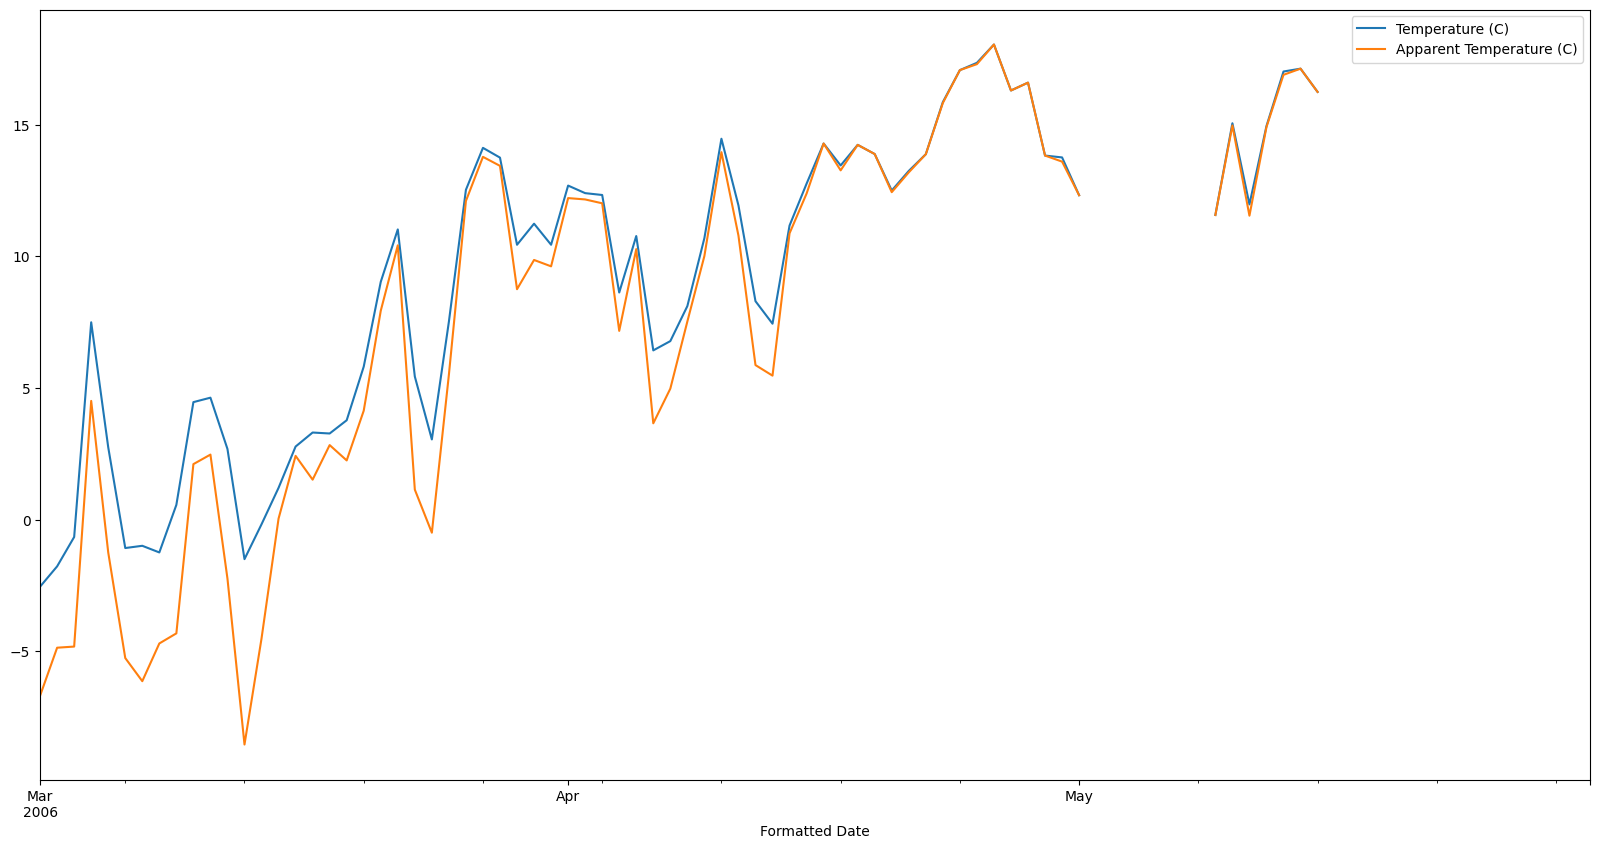

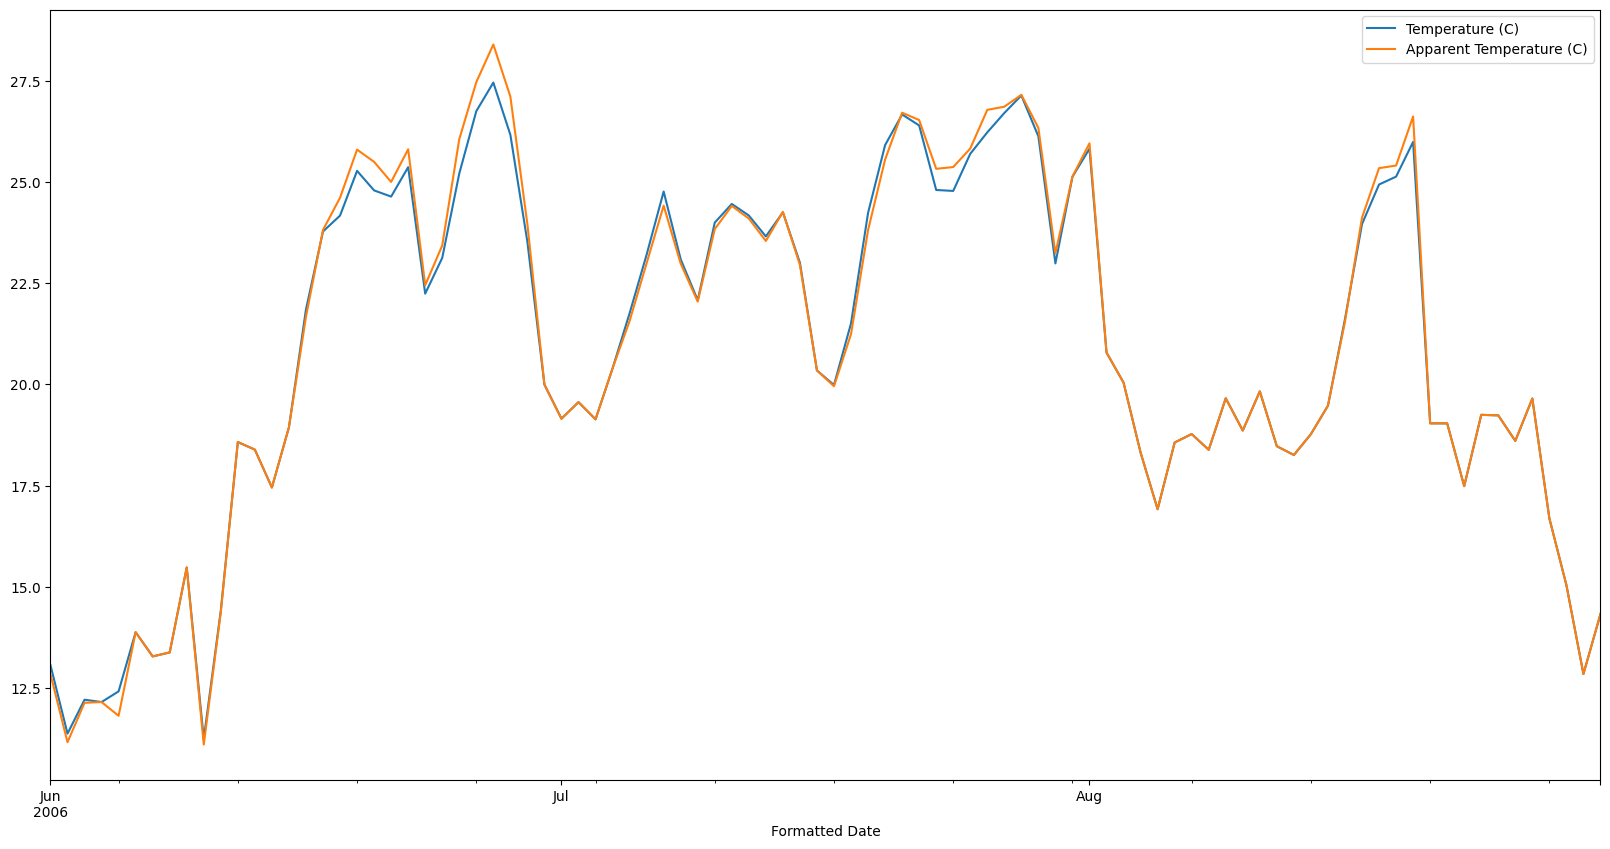

In [164]:
winter.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))
spring.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))
summer.plot(y = ['Temperature (C)','Apparent Temperature (C)'], kind='line',figsize=(20,10))